## User Manual and Demo  
This notebook serves to act both as a demo example and user manual.  
Before beginning, ensure that the following python files are included with this notebook:
* functions.py
* MultiLayerNetwork.py

All datasets should be placed under ./datasets/.

Note that this notebook has been constructed from main.py and serves the same purpose (reconfigured for demonstration purposes). 


To run the multilayer network with the MNIST dataset, use our "Main" branch (https://github.com/ArchambaultP/COMP473-Project/tree/main).

To run the multilayer network with the IRIS dataset, use our "IRIS" branch (https://github.com/ArchambaultP/COMP473-Project/tree/IRIS).

#### Note: For the sake of the demo, it is currently configured for the IRIS dataset.

### Step 1: Import all libraries.  

Note: Ensure that the running python environment has each library included.

In [1]:
import numpy as np
from MultiLayerNetwork import MLN
from pathlib import Path
import csv
from functions import softmax
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Step 2: Define Pre-processing input function  

Note: The pre-processing function is defined differently for MNIST and IRIS. The IRIS dataset did not need to be preprocessed while for the MNIST dataset, train_x and test_x was divided by 255.

In [2]:
def pre_process_data(train_x, train_y, test_x, test_y):
    """
    Pre process MNIST data, may need to process other datasets differently
    """
    train_x = train_x
    test_x = test_x
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))

    test_y = enc.transform(test_y.reshape(len(test_y), -1))

    return train_x, train_y, test_x, test_y

### Step 3: Load data from dataset(s) for training and testing.

Note: To load the data from the IRIS dataset, extract the samples from the "IRIS_train_test.csv" file. It contains the samples for both the training and testing datasets. To define the the training and testing datasets, we split the samples from this file.

Note: To access the datasets for MNIST, it is packaged under ./datasets/MNIST/mnist.zip and should therefore be extracted to ./datasets/ before continuing. There are already 2 separate files for the training and testing dataset. Therefore, splitting a dataset file is not required as the data can be directly loaded from their respective file.

In [3]:
iris_path = Path('datasets/IRIS')
with open(iris_path / "IRIS_train_test.csv", 'r') as file:
    X_data = []
    Y_data = []
    for img in csv.reader(file):
        Y_data.append(img[5])
        X_data.append(img[1:5])

X_train_test = np.array(X_data, dtype=float)
Y_train_test = np.array(Y_data, dtype=str)
Y_train_test = Y_train_test.reshape((Y_train_test.shape[0], 1))
X_train, X_test, Y_train, Y_test = train_test_split(X_train_test, Y_train_test, test_size=0.2, random_state=1)

### Step 4: Process data, assign layer dimensions, and set dropout probability.

Note: To run the code without applying dropout, simply set dropout_probs to [0, 0].

In [4]:
train_x, train_y, test_x, test_y = pre_process_data(X_train, Y_train, X_test, Y_test)

layers_dims = [64, 32, 3]  # Layer dimensions
dropout_probs = [0.5, 0.5]  # Chance to drop each node at Layer l. We exclude output layer from dropout.

### Step 5: Train the model

In [5]:
mln = MLN(layers_dims, dropout_probs)
mln.fit(train_x, train_y, learning_rate=0.1, n_iterations=10000)

Cost:  0.4675676192830154 Train Accuracy: 35.833333333333336
Cost:  0.34591052674499456 Train Accuracy: 46.666666666666664
Cost:  0.2735587925467922 Train Accuracy: 63.33333333333333
Cost:  0.22855878144134595 Train Accuracy: 67.5
Cost:  0.192207657982693 Train Accuracy: 73.33333333333333
Cost:  0.16000058316051 Train Accuracy: 74.16666666666667
Cost:  0.1629751346375648 Train Accuracy: 80.0
Cost:  0.15153060169649993 Train Accuracy: 85.0
Cost:  0.1373319788507999 Train Accuracy: 83.33333333333334
Cost:  0.11163066324097942 Train Accuracy: 84.16666666666667
Cost:  0.10905793713056712 Train Accuracy: 85.83333333333333
Cost:  0.111515167682007 Train Accuracy: 86.66666666666667
Cost:  0.10454091916550759 Train Accuracy: 90.83333333333333
Cost:  0.10666028562526608 Train Accuracy: 90.0
Cost:  0.09686999919031572 Train Accuracy: 82.5
Cost:  0.08874732198633187 Train Accuracy: 87.5
Cost:  0.09277289875675288 Train Accuracy: 92.5
Cost:  0.08629524956588007 Train Accuracy: 87.5
Cost:  0.063915

### Step 6: Output both the training and testing accuracy

In [6]:
print("Train Accuracy:", mln.predict(train_x, train_y))
print("Test Accuracy:", mln.predict(test_x, test_y))

Train Accuracy: 93.33333333333333
Test Accuracy: 93.33333333333333


### Step 7: Display plot

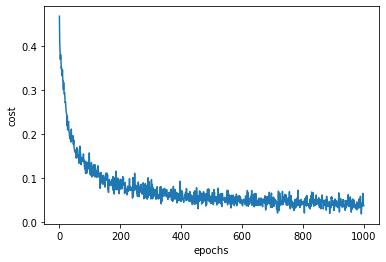

In [7]:
mln.plot_cost()